In [40]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

In [2]:
# Download required NLTK data (only needs to be run once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [94]:
df = pd.read_excel("Orientation Evaluation Data_2025.xlsx", usecols=[10,12,13,16, 17,18])
df.columns

Index(['How would you rate your overall experience with Orientation Week? (Numerical Answer)',
       'Which part of orientation did you find most helpful and why?',
       'Which part of orientation did you find least helpful and why?',
       'The schedule was well balanced between content, interaction, and breaks. (Numerical Answer)',
       'The schedule was well balanced between content, interaction, and breaks.',
       'What changes or improvements would you suggest for Orientation Week and why?'],
      dtype='object')

In [95]:
import statistics

mean_value = statistics.mean(df.iloc[:,0])
print(f"Mean: {mean_value}")
mean_value = statistics.median(df.iloc[:,0])
print(f"Median: {mean_value}")
mean_value = statistics.mode(df.iloc[:,0])
print(f"Mode: {mean_value}")

Mean: 3.5236895161290325
Median: 4.0
Mode: 4.0


In [98]:
import statistics

mean_value = statistics.mean(df.iloc[:,3].dropna())
print(f"Mean: {mean_value}")
mean_value = statistics.median(df.iloc[:,3].dropna())
print(f"Median: {mean_value}")
mean_value = statistics.mode(df.iloc[:,3].dropna())
print(f"Mode: {mean_value}")

Mean: 5.163934426229508
Median: 5.0
Mode: 5.0


In [83]:
df.to_csv("working.csv")

most helpful - word count <br>
most helpful - sentence count <br>
----------------------------- <br>
least helpful - word count <br>
least helpful -sentence count <br>

In [42]:
# Function to count number of words in a text
def count_words(text):
    if pd.isnull(text):
        return 0
    return len(word_tokenize(str(text)))

# Function to count number of sentences in a text
def count_sentences(text):
    if pd.isnull(text):
        return 0
    return len(sent_tokenize(str(text)))

## Average word and sentence counts for each rating category (most helpful)

In [43]:
# Add a column with word counts
df['mostHelp_WordCount'] = df.iloc[:, 1].apply(count_words)

# Group by rating and calculate average number of words
avg_words_per_rating_m = df.groupby(df.iloc[:,0])['mostHelp_WordCount'].mean()

# Print or use the result
print(avg_words_per_rating_m)
print("\nOverall average word count -->",df['mostHelp_WordCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    37.000000
3    40.500000
4    34.060606
Name: mostHelp_WordCount, dtype: float64

Overall average word count --> 37.016129032258064


In [50]:
# Convert Series to DataFrame
avg_words_per_rating_m_df = avg_words_per_rating_m.reset_index()

# Optional: Rename the columns for clarity
avg_words_per_rating_m_df.columns = ['Rating', 'Avg_Word_Count_m']

print(avg_words_per_rating_m_df)

   Rating  Avg_Word_Count_m
0       2         37.000000
1       3         40.500000
2       4         34.060606


In [44]:
# Add a column with sentence counts
df['mostHelp_SentenceCount'] = df.iloc[:, 1].apply(count_sentences)

# Group by rating and calculate average number of sentences
avg_sentences_per_rating_m = df.groupby(df.iloc[:,0])['mostHelp_SentenceCount'].mean()

# Print or use the result
print(avg_sentences_per_rating_m)
print("\nOverall average sentence count -->",df['mostHelp_SentenceCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    2.000000
3    2.142857
4    1.696970
Name: mostHelp_SentenceCount, dtype: float64

Overall average sentence count --> 1.903225806451613


In [49]:
# Convert Series to DataFrame
avg_sentences_per_rating_m_df = avg_sentences_per_rating_m.reset_index()

# Optional: Rename the columns for clarity
avg_sentences_per_rating_m_df.columns = ['Rating', 'Avg_Sentence_Count_m']

print(avg_sentences_per_rating_m_df)

   Rating  Avg_Sentence_Count_m
0       2              2.000000
1       3              2.142857
2       4              1.696970


## Average word and sentence counts for each rating category (least helpful)

In [45]:
# Add a column with sentence counts
df['leastHelp_WordCount'] = df.iloc[:, 2].apply(count_words)

# Group by rating and calculate average number of sentences
avg_words_per_rating_l = df.groupby(df.iloc[:,0])['leastHelp_WordCount'].mean()

# Print or use the result
print(avg_words_per_rating_l)
print("\nOverall average word count -->",df['leastHelp_WordCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    59.000000
3    54.321429
4    31.121212
Name: leastHelp_WordCount, dtype: float64

Overall average word count --> 42.04838709677419


In [47]:
# Convert Series to DataFrame
avg_words_per_rating_l_df = avg_words_per_rating_l.reset_index()

# Optional: Rename the columns for clarity
avg_words_per_rating_l_df.columns = ['Rating', 'Avg_Word_Count_l']

print(avg_words_per_rating_l_df)

   Rating  Avg_Word_Count_l
0       2         59.000000
1       3         54.321429
2       4         31.121212


In [20]:
# Add a column with sentence counts
df['leastHelp_SentenceCount'] = df.iloc[:, 2].apply(count_sentences)

# Group by rating and calculate average number of sentences
avg_sentences_per_rating_l = df.groupby(df.iloc[:,0])['leastHelp_SentenceCount'].mean()

# Print or use the result
print(avg_sentences_per_rating_l)
print("\nOverall average sentence count -->",df['leastHelp_SentenceCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    3.000000
3    2.321429
4    1.454545
Name: leastHelp_SentenceCount, dtype: float64

Overall average sentence count --> 1.8709677419354838


In [48]:
# Convert Series to DataFrame
avg_sentences_per_rating_l_df = avg_sentences_per_rating_l.reset_index()

# Optional: Rename the columns for clarity
avg_sentences_per_rating_l_df.columns = ['Rating', 'Avg_Sentence_Count_l']

print(avg_sentences_per_rating_l_df)

   Rating  Avg_Sentence_Count_l
0       2              3.000000
1       3              2.321429
2       4              1.454545


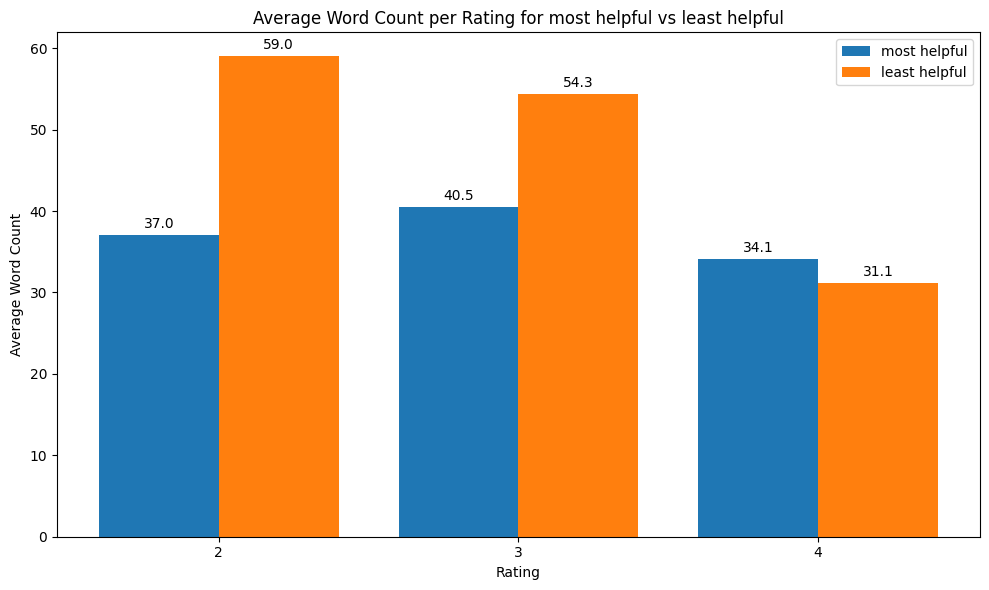

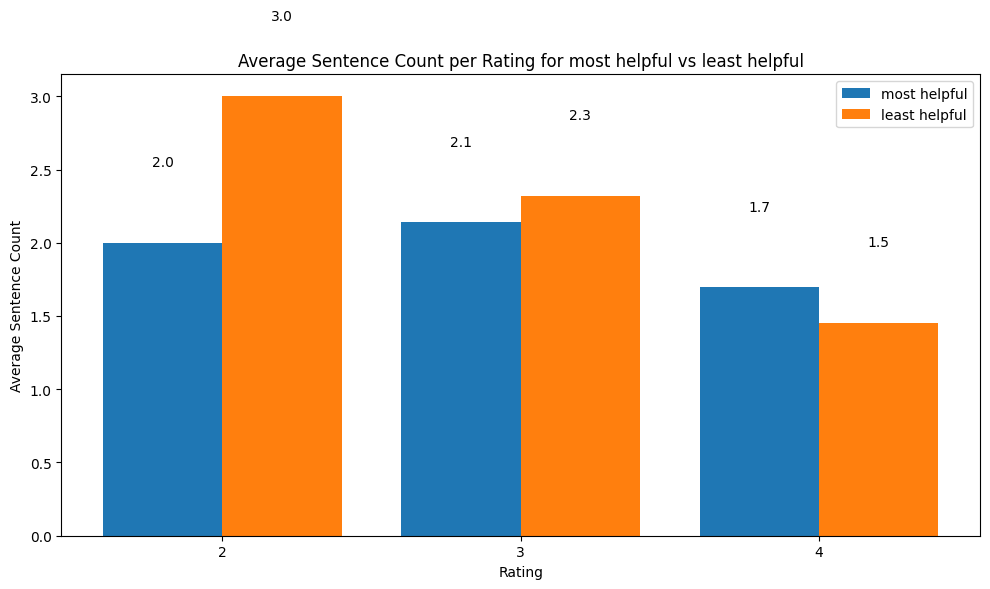

In [21]:
# Plotting
def avgCount_plots(avg_per_rating_m, avg_per_rating_l, ylabel):
    
    labels = avg_per_rating_m.index.astype(str)
    x = range(len(labels))

    bar_width = 0.4
    plt.figure(figsize=(10, 6))

    bars1 = plt.bar(x, avg_per_rating_m, width=bar_width, label='most helpful')
    bars2 = plt.bar([i + bar_width for i in x], avg_per_rating_l, width=bar_width, label='least helpful')

    # Add value labels on top of bars
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center', va='bottom')

    plt.xticks([i + bar_width / 2 for i in x], labels)
    plt.xlabel('Rating')
    plt.ylabel(f'Average {ylabel} Count')
    plt.title(f'Average {ylabel} Count per Rating for most helpful vs least helpful')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
avgCount_plots(avg_words_per_rating_m, avg_words_per_rating_l, "Word")
avgCount_plots(avg_sentences_per_rating_m, avg_sentences_per_rating_l, "Sentence")

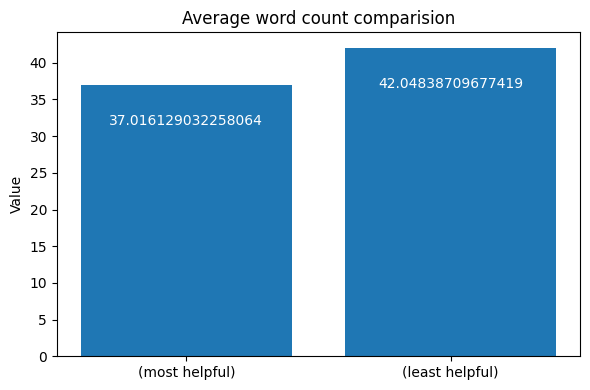

C:\Users\hmudipalli\AppData\Local\Temp\ipykernel_27408\376720676.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


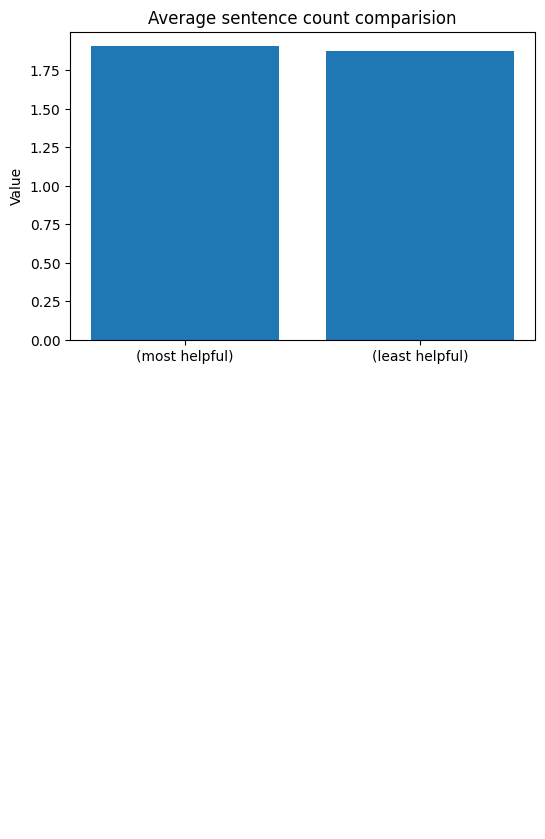

In [22]:
def avgCount_plot2(value1, value2, label):
    
    value1 = value1
    value2 = value2

    # Labels for the bars
    labels = ['(most helpful)', '(least helpful)']
    values = [value1, value2]

    # Create bar plot
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, values)

    # Add value labels inside bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height - 5,                  # Adjust to move inside the bar
            f'{height}',
            ha='center',
            va='center',
            color='white'
        )

    # Add titles and labels
    plt.ylabel('Value')
    plt.title(f'Average {label} count comparision')
    plt.tight_layout()
    plt.show()
    
avgCount_plot2(df['mostHelp_WordCount'].mean(), df['leastHelp_WordCount'].mean(), "word")
avgCount_plot2(df['mostHelp_SentenceCount'].mean(), df['leastHelp_SentenceCount'].mean(), "sentence")

## Average word and sentence counts for each rating category (feedback)

In [56]:
# Add a column with word counts
df['feedBack_WordCount'] = df.iloc[:, -1].apply(count_words)

# Group by rating and calculate average number of words
avg_words_per_rating_f = df.groupby(df.iloc[:,0])['feedBack_WordCount'].mean()

# Print or use the result
print(avg_words_per_rating_f)
print("\nOverall average word count -->",df['feedBack_WordCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    116.000000
3     45.928571
4     39.757576
Name: feedBack_WordCount, dtype: float64

Overall average word count --> 43.774193548387096


In [57]:
# Convert Series to DataFrame
avg_words_per_rating_f_df = avg_words_per_rating_f.reset_index()

# Optional: Rename the columns for clarity
avg_words_per_rating_f_df.columns = ['Rating', 'Avg_Word_Count_f']

print(avg_words_per_rating_f_df)

   Rating  Avg_Word_Count_f
0       2        116.000000
1       3         45.928571
2       4         39.757576


In [60]:
# Add a column with sentence counts
df['feedBack_SentenceCount'] = df.iloc[:, -1].apply(count_sentences)

# Group by rating and calculate average number of sentences
avg_sentences_per_rating_f = df.groupby(df.iloc[:,0])['feedBack_SentenceCount'].mean()

# Print or use the result
print(avg_sentences_per_rating_f)
print("\nOverall average sentence count -->",df['feedBack_SentenceCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    5.000000
3    2.357143
4    1.878788
Name: feedBack_SentenceCount, dtype: float64

Overall average sentence count --> 2.1451612903225805


In [61]:
# Convert Series to DataFrame
avg_sentences_per_rating_f_df = avg_sentences_per_rating_f.reset_index()

# Optional: Rename the columns for clarity
avg_sentences_per_rating_f_df.columns = ['Rating', 'Avg_Sentence_Count_f']

print(avg_sentences_per_rating_f_df)

   Rating  Avg_Sentence_Count_f
0       2              5.000000
1       3              2.357143
2       4              1.878788


In [64]:
from functools import reduce

dfs = [avg_words_per_rating_m_df, 
       avg_sentences_per_rating_m_df, 
       avg_words_per_rating_l_df, 
       avg_sentences_per_rating_l_df, 
       avg_words_per_rating_f_df,
       avg_sentences_per_rating_f_df]

final_df = reduce(lambda left, right: pd.merge(left, right, on='Rating', how='outer'), dfs)

final_df

,Rating,Avg_Word_Count_m,Avg_Sentence_Count_m,Avg_Word_Count_l,Avg_Sentence_Count_l,Avg_Word_Count_f,Avg_Sentence_Count_f
0,2,37.000000,2.000000,59.000000,3.000000,116.000000,5.000000
1,3,40.500000,2.142857,54.321429,2.321429,45.928571,2.357143
2,4,34.060606,1.696970,31.121212,1.454545,39.757576,1.878788


In [66]:
final_df.to_csv("words_sentences_stats.csv")

## High frequency words and phrases (most helpful)

In [67]:
# Load spaCy English model (make sure it's installed)
# Run this once in your environment if not already installed:
# !python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# Example: df with text in column index 1
# df = pd.read_csv('your_file.csv')
text_data = ' '.join(df.iloc[:, 1].dropna().astype(str))

# Process text with spaCy
doc = nlp(text_data.lower())

# Filter: remove stop words, punctuation, and non-alphabetic tokens
filtered_tokens = [
    token.lemma_ for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Count most common lemmatized words
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(20)

# Display results
for word, count in most_common_words:
    print(f"{word}: {count}")


helpful: 34
help: 20
know: 19
feel: 18
study: 18
like: 15
find: 15
activity: 15
presentation: 14
time: 12
student: 12
orientation: 10
start: 10
enjoy: 10
lecture: 10
session: 10
well: 9
professionalism: 9
day: 9
schedule: 8


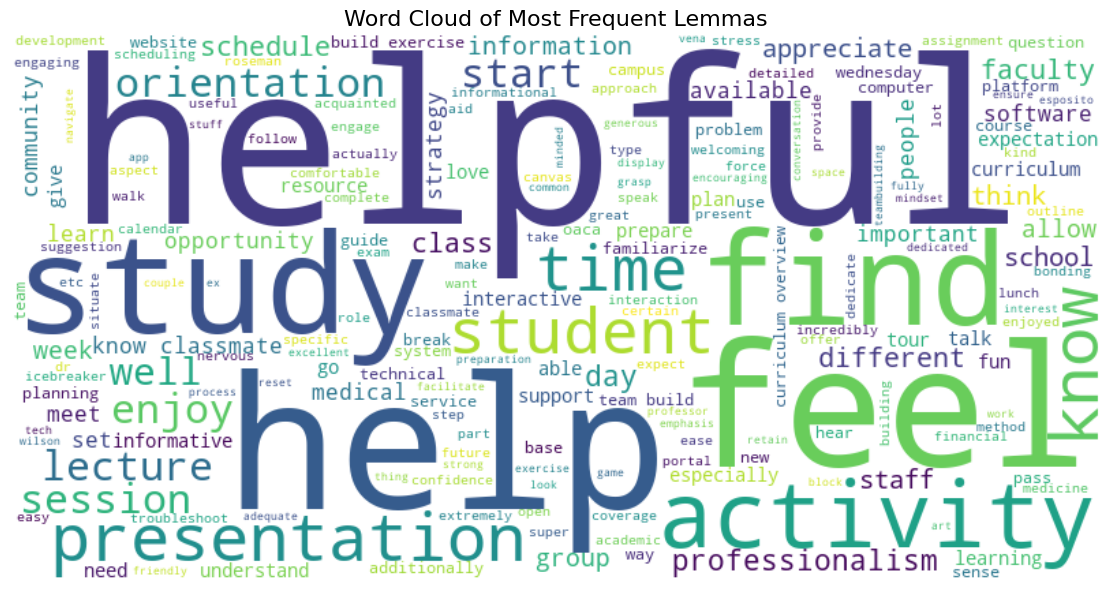

In [13]:
# Join tokens back into string
filtered_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Lemmas', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
text_series = df.iloc[:, 1].dropna().astype(str)

# Preprocess: lemmatize, lowercase, remove stop words and punctuation
def preprocess(text):
    doc = nlp(text.lower())
    return ' '.join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ])

processed_texts = text_series.apply(preprocess)

# Use CountVectorizer to extract n-grams (e.g., bigrams/trigrams)
vectorizer = CountVectorizer(ngram_range=(2, 5), max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# Sum the frequencies of each n-gram
phrase_freq = X.sum(axis=0)
phrases = vectorizer.get_feature_names_out()
counts = phrase_freq.A1

# Combine and sort by frequency
phrase_counts = list(zip(phrases, counts))
sorted_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)

# Show top 20 phrases
for phrase, freq in sorted_phrases[:20]:
    print(f"{phrase}: {freq}")

help know: 5
know classmate: 5
get know: 4
study strategy: 4
activity fun: 3
build exercise: 3
class start: 3
curriculum overview: 3
group activity: 3
help well: 3
helpful informative: 3
helpful orientation: 3
medical school: 3
resource available: 3
staff faculty: 3
team build: 3
team build exercise: 3
activity help: 2
activity learn: 2
activity learn community: 2


In [81]:
# Group text by rating (column 0)
grouped = df.groupby(df.iloc[:, 0])

# For each rating category
for rating, group in grouped:
    print(f"\n--- Top Phrases for Rating: {rating} ---")
    
    # Preprocess each row of text (column 1)
    texts = group.iloc[:, 1].dropna().astype(str).apply(preprocess)
    
    if texts.empty:
        print("No text data.")
        continue
    
    # Convert to list for CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(2, 10), max_features=100)
    X = vectorizer.fit_transform(texts.tolist())
    
    # Get phrase frequencies
    phrase_freq = X.sum(axis=0).A1
    phrases = vectorizer.get_feature_names_out()
    phrase_counts = list(zip(phrases, phrase_freq))
    
    # Sort and display top 10 phrases
    top_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)[:10]
    
    for phrase, freq in top_phrases:
        print(f"{phrase}: {freq}")


--- Top Phrases for Rating: 2 ---
feel useful: 1
feel useful important: 1
hipaa feel: 1
hipaa feel useful: 1
hipaa feel useful important: 1
lecture professionalism: 1
lecture professionalism hipaa: 1
lecture professionalism hipaa feel: 1
lecture professionalism hipaa feel useful: 1
lecture professionalism hipaa feel useful important: 1

--- Top Phrases for Rating: 3 ---
class start: 3
get know: 3
helpful informative: 3
staff faculty: 3
build exercise: 2
campus helpful: 2
curriculum overview: 2
dedicate time: 2
financial aid: 2
find interactive: 2

--- Top Phrases for Rating: 4 ---
help know: 4
know classmate: 4
study strategy: 3
activity fun: 2
activity help: 2
curriculum presentation: 2
help know classmate: 2
help well: 2
helpful orientation: 2
medical school: 2


## High frequency words and phrases (least helpful)

In [71]:
text_data_l = ' '.join(df.iloc[:, 2].dropna().astype(str))

# Process text with spaCy
doc = nlp(text_data_l.lower())

# Filter: remove stop words, punctuation, and non-alphabetic tokens
filtered_tokens = [
    token.lemma_ for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Count most common lemmatized words
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(20)

# Display results
for word, count in most_common_words:
    print(f"{word}: {count}")

helpful: 28
presentation: 24
feel: 22
think: 19
day: 18
find: 16
time: 15
schedule: 14
follow: 13
download: 13
break: 13
like: 12
long: 12
study: 12
lecture: 12
little: 11
orientation: 11
software: 11
information: 10
use: 10


In [17]:
text_series_l = df.iloc[:, 2].dropna().astype(str)

# Preprocess: lemmatize, lowercase, remove stop words and punctuation
def preprocess(text):
    doc = nlp(text.lower())
    return ' '.join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ])

processed_texts = text_series_l.apply(preprocess)

# Use CountVectorizer to extract n-grams (e.g., bigrams/trigrams)
vectorizer = CountVectorizer(ngram_range=(2, 5), max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# Sum the frequencies of each n-gram
phrase_freq = X.sum(axis=0)
phrases = vectorizer.get_feature_names_out()
counts = phrase_freq.A1

# Combine and sort by frequency
phrase_counts = list(zip(phrases, counts))
sorted_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)

# Show top 20 phrases
for phrase, freq in sorted_phrases[:20]:
    print(f"{phrase}: {freq}")

feel like: 7
download software: 6
vh dissector: 5
difficult follow: 4
break little: 3
find helpful: 3
hard follow: 3
helpful wish: 3
learn use: 3
program download: 3
technical issue: 3
able follow: 2
add time: 2
ahead time: 2
anatomy software: 2
app able: 2
appreciate time: 2
break little bit: 2
day instead: 2
demo lecture: 2


In [82]:
# Group text by rating (column 0)
grouped = df.groupby(df.iloc[:, 0])

# For each rating category
for rating, group in grouped:
    print(f"\n--- Top Phrases for Rating: {rating} ---")
    
    # Preprocess each row of text (column 1)
    texts = group.iloc[:, 2].dropna().astype(str).apply(preprocess)
    
    if texts.empty:
        print("No text data.")
        continue
    
    # Convert to list for CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(2, 3), max_features=100)
    X = vectorizer.fit_transform(texts.tolist())
    
    # Get phrase frequencies
    phrase_freq = X.sum(axis=0).A1
    phrases = vectorizer.get_feature_names_out()
    phrase_counts = list(zip(phrases, phrase_freq))
    
    # Sort and display top 10 phrases
    top_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)[:50]
    
    for phrase, freq in top_phrases:
        print(f"{phrase}: {freq}")


--- Top Phrases for Rating: 2 ---
anatomy vh: 1
anatomy vh dissector: 1
complete anatomy: 1
complete anatomy vh: 1
component software: 1
demonstration tuesday: 1
demonstration tuesday useful: 1
dissector etc: 1
dissector etc tuesday: 1
download necessary: 1
download necessary software: 1
download software: 1
download software home: 1
etc tuesday: 1
etc tuesday lot: 1
home zoom: 1
home zoom demonstration: 1
issue probably: 1
issue probably resolve: 1
lot technical: 1
lot technical issue: 1
lot wait: 1
lot wait download: 1
necessary software: 1
necessary software component: 1
probably resolve: 1
probably resolve student: 1
resolve student: 1
resolve student download: 1
set complete: 1
set complete anatomy: 1
software component: 1
software component software: 1
software home: 1
software home zoom: 1
student download: 1
student download software: 1
technical issue: 1
technical issue probably: 1
tuesday lot: 1
tuesday lot technical: 1
tuesday useful: 1
tuesday useful lot: 1
useful lot: 1
u

## Feedback analysis

In [10]:
# Add a column with word counts
df['feedback_WordCount'] = df.iloc[:, 3].apply(count_words)

# Group by rating and calculate average number of words
avg_words_per_rating = df.groupby(df.iloc[:,0])['feedback_WordCount'].mean()

# Print or use the result
print(avg_words_per_rating)
print("\nOverall average word count -->",df['feedback_WordCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    116.000000
3     45.928571
4     39.757576
Name: feedback_WordCount, dtype: float64

Overall average word count --> 43.774193548387096


In [11]:
# Add a column with word counts
df['feedback_SentenceCount'] = df.iloc[:, 3].apply(count_sentences)

# Group by rating and calculate average number of words
avg_sentence_per_rating = df.groupby(df.iloc[:,0])['feedback_SentenceCount'].mean()

# Print or use the result
print(avg_sentence_per_rating)
print("\nOverall average sentence count -->",df['feedback_SentenceCount'].mean())

How would you rate your overall experience with Orientation Week? (Numerical Answer)
2    5.000000
3    2.357143
4    1.878788
Name: feedback_SentenceCount, dtype: float64

Overall average sentence count --> 2.1451612903225805


## High frequency words and phrases (feedback)

In [24]:
nlp = spacy.load("en_core_web_sm")

# Example: df with text in column index 1
# df = pd.read_csv('your_file.csv')
text_data = ' '.join(df.iloc[:, 3].dropna().astype(str))

# Process text with spaCy
doc = nlp(text_data.lower())

# Filter: remove stop words, punctuation, and non-alphabetic tokens
filtered_tokens = [
    token.lemma_ for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Count most common lemmatized words
word_freq = Counter(filtered_tokens)
most_common_words = word_freq.most_common(20)

# Display results
for word, count in most_common_words:
    print(f"{word}: {count}")

day: 36
time: 25
activity: 24
break: 20
orientation: 19
student: 19
like: 17
feel: 16
presentation: 15
think: 15
long: 15
group: 14
maybe: 12
week: 11
know: 11
suggest: 11
download: 10
opportunity: 10
bit: 9
short: 8


In [25]:
text_series = df.iloc[:, 3].dropna().astype(str)

# Preprocess: lemmatize, lowercase, remove stop words and punctuation
def preprocess(text):
    doc = nlp(text.lower())
    return ' '.join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ])

processed_texts = text_series.apply(preprocess)

# Use CountVectorizer to extract n-grams (e.g., bigrams/trigrams)
vectorizer = CountVectorizer(ngram_range=(2, 5), max_features=1000)
X = vectorizer.fit_transform(processed_texts)

# Sum the frequencies of each n-gram
phrase_freq = X.sum(axis=0)
phrases = vectorizer.get_feature_names_out()
counts = phrase_freq.A1

# Combine and sort by frequency
phrase_counts = list(zip(phrases, counts))
sorted_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)

# Show top 20 phrases
for phrase, freq in sorted_phrases[:20]:
    print(f"{phrase}: {freq}")

orientation week: 8
roadrunner group: 5
feel like: 4
get know: 4
interactive activity: 4
long lecture: 4
small group: 4
activity long: 3
add activity: 3
allow student: 3
bonding activity: 3
building activity: 3
day bit: 3
opportunity know: 3
orientation day: 3
activity day: 2
activity long lecture: 2
ahead time: 2
break lecture: 2
break presentation: 2


In [76]:
# Group text by rating (column 0)
grouped = df.groupby(df.iloc[:, 0])

# For each rating category
for rating, group in grouped:
    print(f"\n--- Top Phrases for Rating: {rating} ---")
    
    # Preprocess each row of text
    texts = group.iloc[:, 3].dropna().astype(str).apply(preprocess)
    
    if texts.empty:
        print("No text data.")
        continue
    
    # Convert to list for CountVectorizer
    vectorizer = CountVectorizer(ngram_range=(2, 10), max_features=100)
    X = vectorizer.fit_transform(texts.tolist())
    
    # Get phrase frequencies
    phrase_freq = X.sum(axis=0).A1
    phrases = vectorizer.get_feature_names_out()
    phrase_counts = list(zip(phrases, phrase_freq))
    
    # Sort and display top 10 phrases
    top_phrases = sorted(phrase_counts, key=lambda x: x[1], reverse=True)[:20]
    
    for phrase, freq in top_phrases:
        print(f"{phrase}: {freq}")


--- Top Phrases for Rating: 2 ---
try download: 2
activity awkward: 1
info time team bonding activity awkward question friend feel: 1
info time team bonding activity awkward question friend feel uncomfortable: 1
lighting uneven: 1
lighting uneven make: 1
lighting uneven make difficult: 1
lighting uneven make difficult stay: 1
lighting uneven make difficult stay focused: 1
lighting uneven make difficult stay focused long: 1
lighting uneven make difficult stay focused long period: 1
lighting uneven make difficult stay focused long period time: 1
long period: 1
long period time: 1
lot try: 1
lot try download: 1
lot try download gb: 1
lot try download gb info: 1
lot try download gb info time: 1
lot try download gb info time team: 1

--- Top Phrases for Rating: 3 ---
add activity: 3
activity long: 2
bonding activity: 2
break presentation: 2
building activity: 2
feel like: 2
get know: 2
interactive activity: 2
like people: 2
long lecture: 2
lot information: 2
maybe include: 2
opportunity in